# Question 1 - Imaginary Finite Difference Method

In class we derived the finite difference approximations to the derivative of a function using Taylor expansions. An alternative way to do this is to take an imaginary step $x \rightarrow x + ih$ away from the point $x$, which is assumed real, where $h << 1$ is the step size. Then, the Taylor expansion becomes

$$f(x + ih) \approx f(x) + ih\frac{df}{dx}|_x + ...$$

and taking the imaginary part of the equation gives the derivative as

$$\frac{df}{dx} \approx \frac{Im[f(x + ih)]}{h}

## a) Implementation

Write a python function that uses the complex variables available in python to implement this approximation for $df/dx$. The function should be defined as

> ``def deriv(func, x, h)``

where the parameters are ``func``,  te function $f(x)$ to be differentiated, ``x``, the $x$ value where the derivative will be calculated, and ``h``, the step-size. You should return the numerical value of the derivative.

For example, if you wanted the derivative of $sin(x)$ at $x = 1$ with step-size $h = 10^{-4}$, you could use

> ``dfdx = deriv(np.sin, 1, 1e-4)``

In [1]:
import numpy as np

def deriv(func, x, h):
    ''' Computes the derivative of a function func at a point x using the Imaginary Finite Difference approximation

    Parameters
    ----------
    func : the function to be differentiated
    x : the point at which the derivative is to be computed
    h : the step size

    Returns
    -------
    dfdx : the derivative of func at x   

    '''
    j = complex(0, 1)
    dfdx = np.imag(func(x + h*j))/h
    return dfdx

In [3]:
# Test on the example given in the question
dfdx = deriv(np.sin, 1, 1e-4)
print(dfdx)

0.5403023067686435


## b) Compare to Centred Difference

Use your function to evaluate the derivative of $\sin^3(x)$ at $x = 1.5$ as a function of $h$. Do the same using the centered finite difference derivative. Plot the fractional error (compated to the analytic answer) as a function of step size $h$ for both methods on the same plot. Discuss your results and explain the behaviour you see. How do you explain the differences between the two curves?

The central difference method estimates the first derivative to be
$$\frac{df}{dx} \approx \frac{f(x + \Delta x) - f(x - \Delta x)}{2\Delta x} + O(\Delta x)^2$$

For the function $f = \sin^3(x)$, we know the analytical result can be found as
$$\frac{df}{dx} = 3\sin^2(x)\cos(x)$$

In [5]:
import numpy as np

def cent_difference(func, x, h):
    ''' Computes the derivative of a function func at a point x using the Central Difference approximation

    Parameters
    ----------
    func : the function to be differentiated
    x : the point at which the derivative is to be computed
    h : the step size

    Returns
    -------
    dfdx : the derivative of func at x
    
    '''
    dfdx = (func(x + h) - func(x - h))/(2*h)
    return dfdx

def deriv(func, x, h):
    ''' Computes the derivative of a function func at a point x using the Imaginary Finite Difference approximation

    Parameters
    ----------
    func : the function to be differentiated
    x : the point at which the derivative is to be computed
    h : the step size

    Returns
    -------
    dfdx : the derivative of func at x   

    '''
    j = complex(0, 1)
    dfdx = np.imag(func(x + h*j))/h
    return dfdx

def analytic_deriv(x):
    ''' Computes the analytic derivative of a function func at a point x

    Parameters
    ----------
    x : the point at which the derivative is to be computed

    Returns
    -------
    dfdx : the derivative of func at x   

    '''
    dfdx = 3*(np.sin(x)**2)*np.cos(x)
    return dfdx

def sine_cubed(x):
    ''' The function to be differentiated

    Parameters
    ----------
    x : the point at which the function is to be evaluated

    Returns
    -------
    y : the value of the function at x

    '''
    return (np.sin(x))**3

In [22]:
import numpy as np

test_x = 1.5

h_array = np.logspace(-15, -1, 100)

cent_result = np.array([])
imag_result = np.array([])
analytic_result = analytic_deriv(test_x)

for h in h_array:
    cent_result = np.append(cent_result, cent_difference(sine_cubed, test_x, h))
    imag_result = np.append(imag_result, deriv(sine_cubed, test_x, h))

cent_frac_error = np.abs(cent_result - analytic_result)/analytic_result
imag_frac_error = np.abs(imag_result - analytic_result)/analytic_result

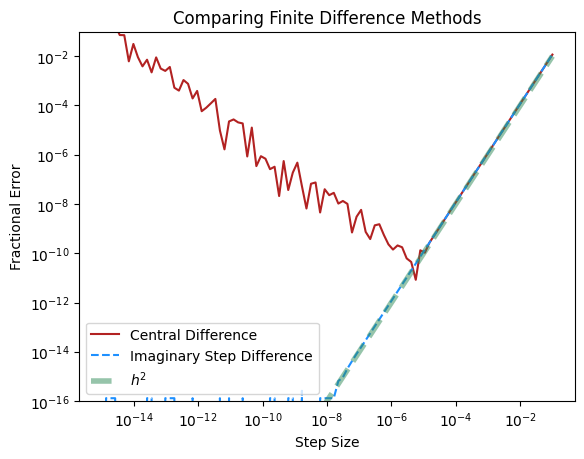

In [27]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.loglog(h_array, cent_frac_error, color = 'firebrick', label = 'Central Difference')
plt.loglog(h_array, imag_frac_error, color = 'dodgerblue', linestyle = "--", label = 'Imaginary Step Difference')
plt.loglog(h_array, h_array**2, color = 'seagreen', linestyle = "--", linewidth = 4, alpha = 0.5, label = '$h^2$')
plt.ylim(1e-16, 1e-1)
plt.xlabel('Step Size')
plt.ylabel('Fractional Error')
plt.title("Comparing Finite Difference Methods")
plt.legend()
plt.show()

**Discuss your results and explain the behaviour you see. How do you explain the differences between the two curves?**

For both methods, we can see that the fractional error scales with $h^2$ once they are past their optimal step size. For any method, the optimal step size is that which balances the truncation and round-off errors. For the *central difference method*, this is because the final truncated term is of order $O(\Delta x)^2$. The optimal step size is around $\epsilon^{1/3} \approx 10^{-5.3}$. This can be seen as the error decreases as step size approaches the optimal step size and then drastically increases after it has reached this point. This is because, after the optimal step size, the subtractive cancellation errors become significant. For the *imaginary step method*, it scales with $h^2$ because every second term in the Taylor expansion is imaginary. The optimal step size is around $\epsilon^{1/2} \approx 10^{-8}$. Since the imaginary step method does not use any subtractive cancellations, beyond the optimal step-size this approximation matches the analytic result down to the round-off error.

# Question 2 - Solving the Schrodinger Equation

Solve the time-independent Schrodinger equation
$$\frac{-\hbar^2}{2m}\frac{d^2\Psi}{dx^2} + V(x)\Psi = E\Psi$$
for a particle moving in the 1D potential
$$V(x) = -\exp(-\sqrt{|x|})$$
for $-\infty < x < \infty$. Plot the ground state wavefunction $\Psi_0(x)$ and obtain a numerical value for the energy of the ground state that is accurate to at least 1 part in 1000 (0.001). You should demonstrate this by obtaining a numerical estimate of the energy error.

Please note: My group solved the Schrodinger equation with different numerical methods as part of the group project. I am adapting the code for the finite difference method, which I co-wrote.

In [28]:
## Finite Difference
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def potential_function(x):
    '''
    The potential function for the particle.
    Inputs:
    - x: The position of the particle.

    Outputs:
    - U: The potential at the given position.
    '''
    U = np.zeros_like(x)
    for i in range(len(x)):
        cur_x = x[i]
        U[i] = -1*np.exp(-1*np.sqrt(np.abs(cur_x)))
    return U

def finite_difference(potential_func, N, num_plots = 4, plot = True, scale = 1):
        '''
        Solves the Schrodinger equation using the finite difference method
        and plots the results.
        Inputs:
        - potential_func: The potential function for the particle.
        - N: The number of points in the grid.
        - num_plots: The number of energy levels to plot.
        - plot: Whether or not to plot the results.
        - scale: The scaling factor for the wave functions.

        Outputs:
        None

        '''
        def create_hamiltonian_matrix(N, m, hbar, Vpot, dx):
                """
                Helper Function
                Create the Hamiltonian matrix for the given potential.
                Inputs:
                - N: The number of points in the grid.
                - m: The mass of the particle.
                - hbar: Planck's constant.
                - Vpot: The potential array for the particle.
                - dx: The step size.

                Outputs:
                - Hmat: The Hamiltonian matrix.
                """
                diag_el = hbar**2/(m*dx**2)*np.ones(N-1) + Vpot
                off_diagonal_elements = -hbar**2/(2*m*dx**2)*np.ones(N - 2)
                Hmat = np.diag(diag_el) + np.diag(off_diagonal_elements, 1) + np.diag(off_diagonal_elements, -1)

                return Hmat
        
        
        hbar = 1 # Planck's constant set to 1 for simplicity
        m = 1 # Mass of the particle set to 1 for simplicity
        a = 50 # Length of the well

        x = np.linspace(-25, 25, N-1) # Grid points
        dx = x[1] - x[0] # Step size
        xp = np.linspace(-(a-dx), a-dx, N-1) # Grid points for plotting

        U = potential_func(x) # Potential function
        E, psi = eigh(create_hamiltonian_matrix(N, m, hbar, U, dx)) # Solve the Schrodinger equation
        
        if plot:
            # Get a color map
            cmap = plt.get_cmap('cool')
            colors = [cmap(i) for i in np.linspace(0, 1, num_plots)]

            plt.figure(1)
            plt.title(f"Finite Difference Method")
            plt.plot(x[1:-1], U[1:-1], 'k--', label = "Potential")
            plt.xlim(-10, 10)

            for i in range(num_plots): 
                cur_psi = psi.T[i]

                # Normalise the Wavefunction and plot PDF
                I = np.sum(cur_psi**2 * dx)
                A = np.sqrt(1/I)
                plt.plot(xp, (scale*A*cur_psi)**2 + E[i], color = colors[i], label = f"Normalised PDF of n = {i}")

                # Plot regular wavefunction
                plt.plot(xp, cur_psi*scale + E[i], color = "firebrick", label = f"Wavefunction of n = {i}")
                plt.xlabel("Position")
                plt.ylabel("Energy (J)")

                # Plot a straight dotted line at the energy level
                plt.plot(xp, np.ones_like(xp)*E[i], '--', color = 'dodgerblue', label = f"Energy level {i}")

                plt.legend()
                                
                print(f"Energy level {i}: {E[i]}")
        return E, psi

In [18]:
numsteps = np.linspace(100, 1000, 100)
energy = np.zeros_like(numsteps)
for i in range(len(numsteps)):
    energy[i] = finite_difference(potential_function, int(numsteps[i]), 1, plot = False)[0]

Minimum number of steps required to converge to an error less than 1 part in 1000: 290.90909090909093
Energy level 0: -0.35884934000621954
For 1000.0 steps, the energy is -0.35885 ± 0.00002 J


Text(0.5, 1.0, 'Convergence to Ground State Energy')

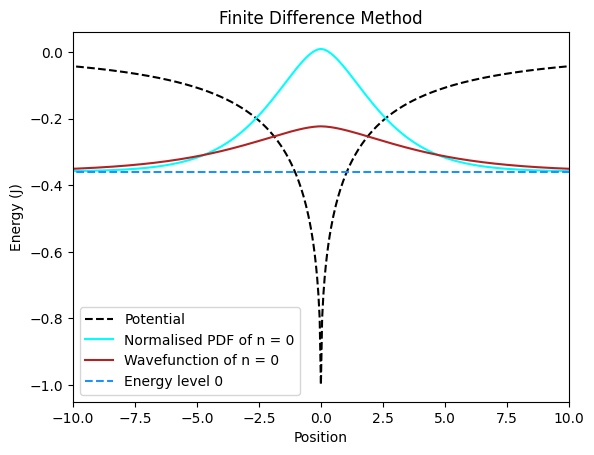

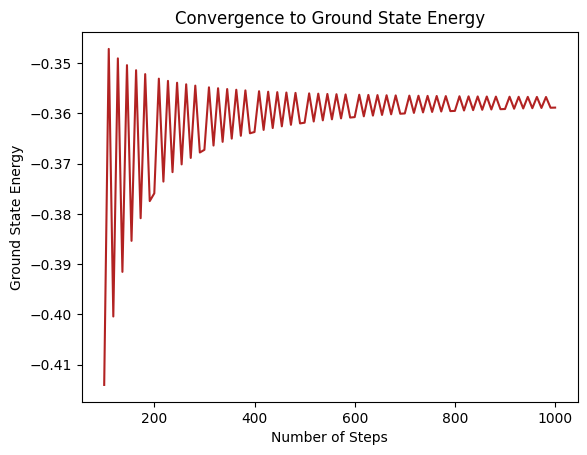

In [27]:
for i in range(len(energy) - 1):
    if np.abs(energy[i] - energy[i+1]) < 1e-3:
        print(f"Minimum number of steps required to converge to an error less than 1 part in 1000: {numsteps[i]}")
        break

__ = finite_difference(potential_function, int(numsteps[-1]), 1, plot = True)

plusminus = u'\u00b1'
print(f"For {numsteps[-1]} steps, the energy is {energy[-1]:.5f} {plusminus} {np.abs(energy[-1] - energy[-2]):.5f} J")

plt.figure(2)
plt.plot(numsteps, energy, color = 'firebrick')
plt.xlabel("Number of Steps")
plt.ylabel("Ground State Energy")
plt.title("Convergence to Ground State Energy")

From this convergence graph, and the statement printed above it, the minimum number of steps to have an energy that varies by less than 0.001 is around 290 steps. Therefore, using 1000 steps will definitely provide a small enough error to satisfy the requirement. In the case of 1000 steps, the ground state energy for this potential landscape is $E_0 = -0.35885 \pm 0.00002$ Joules.

# Question 3 - Thermal Diffusion

A thin slab of material cools from its surface. The horizontal dimensions of the slav are much larger than its thickness, so we can follow the cooling using the 1D therm diffusion equation

$$\frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2}$$

where $\kappa$ is the thermal diffusivity. In this particular sample of material, the thermal diffusivity is non-uniform. The data file ``final_data.txt`` gives some measurements of the thermal diffusivity in units of $cm^2/s$ as a function of height $x$ in the slab from $x = 0$ at the base of the slab to $x = 1$ cm at the top of the slab. In the file, column 1 is the $x$ position and column 2 is the measured value of $\kappa$.

The slab is initially at $T = 100$ K everywhere, and at $t = 0$ the surface of the slab at $x = 1$ is suddenly cooled to $T = 0$ K and held at that temperature. The base of the slab at $x = 0$ is insulating.

Calculate the temperature of at the base of the slab at $t = 1$ second.

**Explanation**

The method of lines is the way to do time-evolution of partial differention equations. Consider the thermal diffusion equation:

$$\frac{\partial T}{\partial t} = \kappa\frac{\partial^2T}{\partial x^2}$$

where we have a thermal diffusivity $\kappa(x)$ which varies with $x$. In the method of lines, we transform the PDE into an ODE by finite differencing the spatial derivative on a grid in $x$:

$$\frac{dT_i}{dt} = \frac{T_{i+1} - 2T_i + T_{i-1}}{(\Delta x)^2}$$

where $T_i$ is the temperature at $x = x_i$. If there are N grid points, there are N coupled ODEs that we can integrate in time. Using first principles, the LHS of that equation becomes:

$$\frac{T_{i+1} - T_{i}}{dt} = \frac{T_{i+1} - 2T_i + T_{i-1}}{(\Delta x)^2}$$

which can in turn be rearranged to solve for $T_{i+1}$ at position $i$ and time $n$ as:

$$T_{i}^{n+1} = \kappa(x)\frac{\Delta t}{\Delta x^2}(T_{i+1}^{n+1} - 2T_i^{n+1} + T_{i-1}^{n+1}) + T_i^{n}$$

for some length element $\Delta x$ and time element $\Delta t$. We can then simplify using $\alpha(x) = \kappa(x)\frac{\Delta t}{\Delta x^2}$:

$$T_{i}^{n+1} = \alpha(x)(T_{i+1}^{n+1} - 2T_i^{n+1} + T_{i-1}^{n+1}) + T_i^{n}$$
$$T_{i}^{n} = -\alpha(x)T_{i-1}^{n+1} + (1 + 2\alpha(x))T_i^{n+1} - \alpha(x)T_{i+1}^{n+1}$$

This is of the form $AT^{n+1}$ where the matrix $A$ is tridiagonal with $-\alpha$ on the upper and lower diagonals and $1 - 2\alpha$ on the main diagonal.

Now, we can implement the vector $b$ to contain the boundary conditions which will give us an equation of the form

$$AT^{n+1} = T^n + \alpha(x)b$$

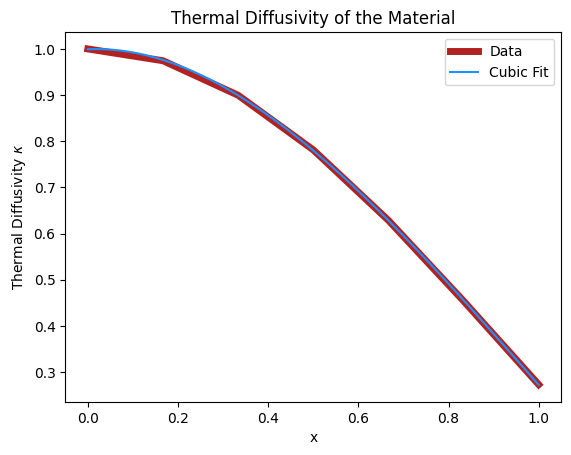

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the file
data = np.loadtxt("final_data.txt")
x_values = data[:, 0]
therm_diff_vals = data[:, 1]

# Fit a curve to the data
therm_fit = np.polyfit(x_values, therm_diff_vals, 3) # Fit to a cubic
therm_fit_fn = np.poly1d(therm_fit) # Create a function from the fit to get kappa at any x

test_x = np.linspace(0, 1, 1000)

plt.figure(1)
plt.plot(x_values, therm_diff_vals, color = 'firebrick', linewidth = 5, label = "Data")
plt.plot(test_x, therm_fit_fn(test_x), color = 'dodgerblue', label = "Cubic Fit")
plt.xlabel("x")
plt.ylabel("Thermal Diffusivity $\kappa$")
plt.title("Thermal Diffusivity of the Material")
plt.legend()
plt.show()

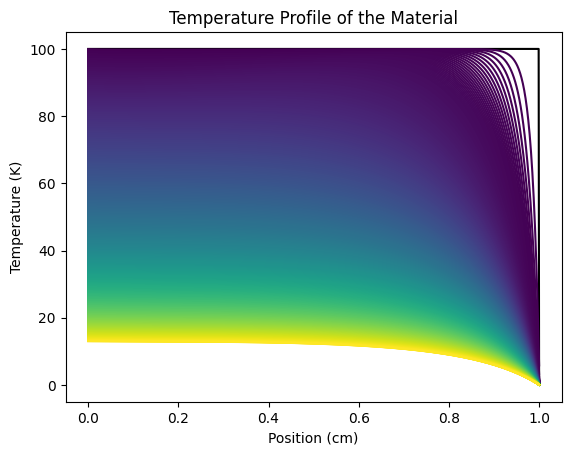

The temperature at x = 0 at t = 1 is 13.022 K


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

#####
# Code adapted from the github solutions to the thermal diffusion in-class exercise
#####

x = np.linspace(0, 1, 1001)
kappa_array = therm_fit_fn(x)

T = 100*np.ones_like(x) # Begin with T = 100 everywhere
T[-1] = 0.0 # Implement boundary condition at x = 1

# Plot the initial temperature profile
plt.plot(x, T, color = 'black')
plt.xlabel(r'Position (cm)')
plt.ylabel(r'Temperature (K)')

dx = x[1] - x[0]
dt = 1e-3

num_time_steps = int(1/dt)

alpha_k = dt/dx**2 * kappa_array

# Calculate the matrix A in banded form
b = (1 + 2 * alpha_k)
b[0] = 1 + alpha_k[0] # implement insulating boundary at x = 0

a = -1 * alpha_k
c = -1 * alpha_k
c[-1] = 0.0
a[0] = 0.0

AA = np.row_stack((a, b, c))

# form the bounary conditions vector
bvec = np.zeros_like(x)
bvec[-1] = 0 # Hold the boundary at x = 1 at T = 0

# Get color list
cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, num_time_steps)]

for i in range(0, num_time_steps):
    T = scipy.linalg.solve_banded((1, 1), AA, T + (dt/dx**2)*bvec)
    plt.plot(x, T, color = colors[i])

plt.title("Temperature Profile of the Material")
plt.show()

print(f"The temperature at x = 0 at t = 1 is {T[0]:.3f} K")

The temperature at the x = 0 boundary after 1 second is 13.022 K

# Question 4 - Neutron Radioactive Decay

When two neutron stars merge, a mixture of many different radioactive elements is produced. The amount of each element decays with time according to

$$\frac{dN}{dt} = -\frac{N}{\tau}$$

where $N$ is the number of atoms of that element, and the decay timescale $\tau$ is different for each element. Assume that the decay timescales $\tau$ for these elements are randomly distributed between $10^3$ and $10^7$ seconds with a uniform distribution in $log_{10}(\tau)$, and that 100 different elements are produced (with equal numbers of atoms initially). The total energy per second released by the radioactive decays is proportional to

$$\sum _i \frac{dN_i}{dt}$$

where the sum is over each element. Generate a random sample of 100 values of $\tau$ and integrate the decay of the 100 elements over time. Plot the total energy per second from radioactive decays over the first $10^6$ seconds. Do you agree with the prediction of Li & Paczynski that the total energy per second is a power law, decaying $\propto 1/t$?

In [100]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

num_elements = 100 # Num elements

# Generate random decay timescales in log space
tau_min = 3  # log10(10^3)
tau_max = 7  # log10(10^7)
tau_values = 10**np.random.uniform(tau_min, tau_max, num_elements)

N_initial = 1000 # Num initial atoms per element

total_time = 1e6
dt = 1.0

time_values = np.arange(0, total_time, dt)
energy_values = np.zeros_like(time_values)

# Integrate the decay for each element
for tau in tau_values:
    decay_constant = 1.0 / tau
    N = N_initial * np.exp(-1 * decay_constant * time_values)
    energy_values += decay_constant * N


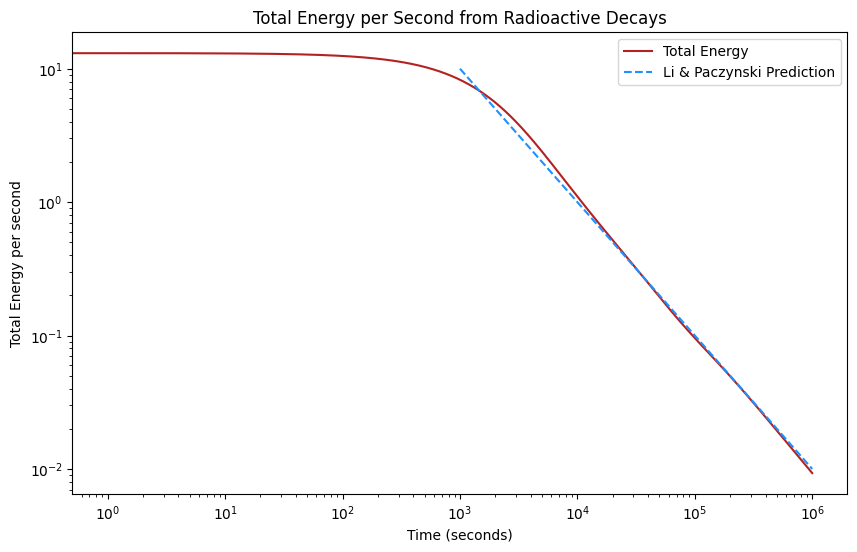

In [102]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_values, energy_values, label='Total Energy', color = 'firebrick')

# Plot the line for power-law decay prediction
t_line = np.logspace(3, 6, 100)
energy_line = 1.0 / t_line
plt.plot(t_line, energy_line * 10000, label='Li & Paczynski Prediction', linestyle='--', color='dodgerblue')

plt.xlabel('Time (seconds)')
plt.ylabel('Total Energy per second')
plt.title('Total Energy per Second from Radioactive Decays')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

From the graph above, we can definitely see that the regime of $10^3 \rightarrow 10^6$ seconds follows the power law fit put forward by Li and Paczynski. This makes sense because $\tau$ ranges from $10^3 \rightarrow 10^7$, which directly controls the decay constant.